## Problema de negocio

ALL in ONE PLANE - empresa que comercializa produtos de segunda linha de varias marcas um preço menor, atraves de um e-commerce.

1 ano de operação o time de marketing percebeu que alguns clientes da sua base, compram produtos mais caros, com alta frequancia e acabam contribuindo com uma parcela grande no faturamento da empresa.

baseado nessa analise, o marketing deseja criar um programa de fidelidade para os melhores clientes, chamado INSIDER, mas o time não tem conhecimento avançado em analise de dados para eleger os participantes.

por esse motivo, o time de marketing requisitou ao time de dados uma seleção de clientes elegiveis ao programa, usando tecnicas avançadas de manipulação de dados.

_____________________________________________________

### O desafio

O time de ciencia de dados da ALL in ONE PLACE, que precisa determinar quem são os clientes elegíveis para participar de INSIDERS.

Como o resultado para esse projeto, é esperado que você entregue uma lista de pessoas elegiveis a participar do programa INSIDERS, junto com um relatorio respondendo as seguintes perguntas:

1. Quem são as pessoas elegiveis para participar do programa de INSIDERS

2. Quantos clientes farão parte do grupo

3. quais as principais caracteristicas desses clientes

4. Qual a porcentagem da contribuição do faturamento, vinda dos INSIDERS

5. Qual a expectativa de faturamento desse grupo para os proximos meses

6. Quais as condições para uma pessoa ser elegivel ao INSIDERS

7. Quais as condições para uma pessoa ser removida dos INSIDERS

8. Qual a garantia que o programa INSIDERS é melhor que o restante da base

9. Quais ações o time de marketing pode realizar para aumentar o faturamento

__________________________________________________

### Planejamento da Solução (IOT) 

Intput(entrada)

    1. Problema de negocio (Selecionar clientes para fidelização)

    2. Conjunto de dados (Vendas de um e-commerce durante 1 ano)

Output(saida)

    1. Indicação das pessoas que farão parte do programa 'Insiders'
        - Lista: cliente_id | is_insiders

    2. Relatório com as perguntas de negocio acima

__________________________________________________

### Dados

Cada linha representa uma transação de venda, que ocorreu entre o periodo de Nov 2016 e Dez 2017

o conjunto de dados inclui as seguintes informações:

- *invoice number* -> identificador unico de cada transação
- *stock code product* -> codigo do item
- *description product* -> nome do item
- *quantity* -> a quantidade de cada item comprado por transação
- *invoice date* -> o dia em que a transasção ocoreu
- *unit price* -> preco do produto por unidade
- *customer id* -> identificador unico do cliente
- *country* -> o nome do pais que o cliente reside

__________________________________________________

### Tasks

1. Quem são as pessoas elegiveis para participar do programa de INSIDERS
    - O que é ser elegível? O que são clientes de maior 'valor'?
    - faturamento: 

        - Alto ticket médio (compras)
        - Alto LTV (total de compras)
        - Baixo Recência (tempo de ultima compra)
        - Alto basket size (cestinha)
        - Baixa probabilidade de churn (saída de cliente)
        - Alta Previsão de LTV
        - Alta propensão de compra

    - Custo

        - Baixa taxa de devolução
    

    - Experiencia de compra
    
        - Media alta das avaliações
        

2. Quantos clientes farão parte do grupo
    - Numero total de clientes

    - % do grupo insiders


3. quais as principais caracteristicas desses clientes
    - Escrever caracteristicas do cliente:
        - Idade
        - Localização

    - Escrever caracteristicas do consumo
        - Atributos de clusterização

4. Qual a porcentagem da contribuição do faturamento, vinda dos INSIDERS
    - Faturamento total do ano
    - Faturamento do grupo insiders

5. Qual a expectativa de faturamento desse grupo para os proximos meses
    - LTV do grupo insiders
    - Analise de cohort

6. Quais as condições para uma pessoa ser elegivel ao INSIDERS
    - Definir periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser similar ou parecido com uma pessoa do grupo

7. Quais as condições para uma pessoa ser removida dos INSIDERS
    - Definir periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser desimilar ou não parecida com uma pessoa do grupo

8. Qual a garantia que o programa INSIDERS é melhor que o restante da base
    - Testes A/B
    - Teste A/B bayesiano
    - Teste de hipótese

9. Quais ações o time de marketing pode realizar para aumentar o faturamento
    - Desconto
    - Preferencia de compra
    - Frete

___________________________________________________________________

## Benchmark de soluções

### Desk Research

#### - RFM

#### 1. Recencia
    - Tempo desde a ultima compra
    - Responsividade (sempre comprando)

#### 2. Frequencia
    - Quantidade de compra em um determinado periodo de tempo
    - Engajamento (interações)

#### 3. Monetario
    - Total gasto(faturamento)
    - Alto valor de compra

### Passo a Passo:

1. Passo 1
    - ordenar os clientes por recencia

2. Passo 2
    - Dividir a base de clientes de acordo com as notas
        - notas de 1-5 (5notas)
        - 5 grupos de 20% da base

3. passo 3
    - Ordenar os clientes por Frequencia

4. passo 4
    - Dar as notas

5. passo 5
    - Ordenar os clientes pelo monetario

6. passo 6
    - Dar as notas

7. passo 7
    - Calcular a média das NOTAS para o R, F, M

### Segmentação dos Clientes


- Champions
    - compras recentes, frequantes com alto valor gasto.
    - Premios para esses clientes

- Potencial Loyalist
    - Compras recentes, boa frequencia e bom valor gasto
    - Programa de fidelização e Upsell

- New Customers
    - Compra recente, baixa frequencia
    - Construção de relacionamento, ofertas especiais.

- At Risk Customers
    - 'Faz tempo que não compra'
    - Campanhas de reativação, ofertas, produtos

- Can´t Lose Them
    - Faz temnpo que não compra e nem visita



## Imports

In [1]:
import re

import numpy as np
import pandas as pd
import seaborn as sns

import umap.umap_ as umap

from sklearn import cluster as c
from sklearn.cluster import KMeans
from sklearn import metrics as m

from matplotlib import pyplot as plt

from plotly import express as px

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#visualizar todo o dataset
pd.set_option('display.max_columns', None)  # Define para mostrar todas as colunas
pd.set_option('display.expand_frame_repr', False)  # Evita quebras de linha nas colunas

c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Dataset

In [2]:
df_raw = pd.read_csv('Ecommerce.csv', sep=',', encoding='unicode_escape')

#dropando coluna extra
df_raw.drop(columns='Unnamed: 8', inplace=True)

In [3]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Descrição dos Dados

In [4]:
df1 = df_raw.copy()

### Rename columns

In [5]:
palavras_corrigidas = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']

df1.columns = palavras_corrigidas

### Data dimensions

In [6]:
print(f'Numbers of rows: {df1.shape[1]}')
print(f'Numbers of cols: {df1.shape[0]}')

Numbers of rows: 8
Numbers of cols: 541909


### Data types

In [7]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [8]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


### Check NaN

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### Replace Nan

In [10]:
#remove NaN
df1 = df1.dropna(subset=['description', 'customer_id'])
print('Remove data: {:.2f}%'.format(1 - (df1.shape[0] / df_raw.shape[0]))) #retornando o valor removido em porcentagem da base de dados

Remove data: 0.25%


### Check types

In [11]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [12]:
#invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y') #format(dia-abrv_mes-ano)

#costumer id
df1['customer_id'] = (df1['customer_id']).astype(int)

### Descriptive statistcs

In [13]:
num_attributes = df1.select_dtypes(include=['int', 'float'])
cat_attributes = df1.select_dtypes(exclude=['int', 'float', 'datetime64[ns]'])

#### Numerical attributes

In [14]:
# Calcular as estatísticas resumidas
summary_stats = num_attributes.agg(['mean', 'median', 'std', 'min', 'max', lambda x: x.max() - x.min(), 'skew', 'kurtosis']).T.reset_index() #agregando

# Renomear as colunas
summary_stats.columns = ['index' ,'mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis'] # alterando nomes das colunas
summary_stats

,index,mean,median,std,min,max,range,skew,kurtosis
0,quantity,12.061303,5.00,248.693370,-80995.0,80995.0,161990.0,0.182663,94317.563673
1,unit_price,3.460471,1.95,69.315162,0.0,38970.0,38970.0,452.219019,246924.542988
2,customer_id,15287.690570,15152.00,1713.600303,12346.0,18287.0,5941.0,0.029835,-1.179982


##### Numerical Attributes - investigating
 - quantidade negativa (pode ser devolução)
 - preço unitario igual a zero (pode ser promoção)

#### Cat Attributes

In [15]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [16]:
cat_attributes[cat_attributes['invoice_no'].str.contains(r'[a-zA-Z]')]

,invoice_no,stock_code,description,country
141,C536379,D,Discount,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,United Kingdom
...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,United Kingdom
541541,C581499,M,Manual,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,United Kingdom


In [34]:
# invoice_no

df_filtrado = cat_attributes[cat_attributes['invoice_no'].str.contains(r'[a-zA-Z]')]
invoice_no_letras = len(df_filtrado['invoice_no'].unique())

print(f'invoice_no unicos contem que contem letras e numeros: {invoice_no_letras}')

invoice_no unicos contem que contem letras e numeros: 3654


In [18]:
# stock_code

#letra e numero
#unicos
df_filtrado = cat_attributes[cat_attributes['stock_code'].str.contains(r'[a-zA-Z]')]
letra_numero_uni = len(df_filtrado['stock_code'].unique())
#totais
df_filtrado = cat_attributes[cat_attributes['stock_code'].str.contains(r'[a-zA-Z]')]
letra_numero_tot = len(df_filtrado['stock_code'])

#apenas letra
#unicos
df_filtrado = cat_attributes[cat_attributes['stock_code'].str.contains(r'^[a-zA-Z]')]
letra_apenas_uni = len(df_filtrado['stock_code'].unique())
#totais
df_filtrado = cat_attributes[cat_attributes['stock_code'].str.contains(r'^[a-zA-Z]')]
letra_apenas_tot = len(df_filtrado['stock_code'])


print(f'stock_code unicos contem que contem letras e numeros: {letra_numero_uni}')
print(f'stock_code totais contem que contem letras e numeros: {letra_numero_tot}\n')


print(f'stock_code unicos contem que contem letras: {letra_apenas_uni}')
print(f'stock_code totais contem que contem letras: {letra_apenas_tot}')

stock_code unicos contem que contem letras e numeros: 886
stock_code totais contem que contem letras e numeros: 35809

stock_code unicos contem que contem letras: 8
stock_code totais contem que contem letras: 1920


In [39]:
#vendo quais stockcodes são strings
df_filtrado = cat_attributes[cat_attributes['stock_code'].str.contains(r'^[a-zA-Z]')]
df_filtrado['stock_code'].unique()

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

## Filtragem de Variaveis

In [40]:
df2 = df1.copy()

In [41]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

In [42]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [43]:
# ======== Numerical Attributes ========
#unit price > 0.0
df2 = df2.loc[df2['unit_price'] > 0.010, :]                             # existem produtos que tem uma descrição diferente, menos de 1

#stock code != [POST, D, M, DOT, CRUK]
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'M', 'DOT', 'CRUK'])]    # deletando stock code

#description

##quantity - negative numbers means product returns
df2_returns = df2.loc[df2['quantity'] < 0, :]                           # devoluções
df2_purchase = df2.loc[df2['quantity'] > 0, :]                          # compras

## Feature Engineering

In [46]:
df3 = df2.copy()

### Feature Creation

In [47]:
#data reference
df_ref = df3.drop([ 'invoice_no', 'stock_code', 'description',
                    'quantity', 'invoice_date', 'unit_price',
                    'country'], axis=1).drop_duplicates(ignore_index=True)

In [48]:
#Gross Revenue (Faturamento) quantidade * preco = Faturamento
df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']

#Monetary
df_monetary = df2_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how='left')
df_ref.isna().sum()

C:\Users\Cliente\AppData\Local\Temp\ipykernel_13680\411023275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']


customer_id       0
gross_revenue    27
dtype: int64

In [49]:
#Recency (data da ultima compra)
df_recency = df2_purchase[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()                # agrupando e pegando o max = valor de compra mais recente na base
df_recency['recency_days'] = (df2_purchase['invoice_date'].max() - df_recency['invoice_date']).dt.days               # pegando o numero de dias de (dt atual - ultima compra)
df_recency = df_recency[['customer_id', 'recency_days']].copy()                                                      # salvando no df apenas id e dias da ultima compra

df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')                                                  # merge de ordenação
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

In [50]:
#Frequency (quantas compras dentro do periodo de 1 ano)
df_freq = df2_purchase[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()

df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
dtype: int64

In [51]:
#AVG ticket
df_avg_gross_ticket = df2_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_gross_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
dtype: int64

In [54]:
#Number returns
df_returns = df2_returns[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no': 'returns'})
df_ref = pd.merge(df_ref, df_returns, how='inner', on='customer_id')
df_ref.loc[df_ref['returns'].isna(), 'returns'] = 0
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
returns           0
dtype: int64

In [30]:
'''#data reference
# retorna os clientes unicos da base, sem duplicar
df_ref = df2.drop([ 'invoice_no', 'stock_code', 'description',
                    'quantity', 'invoice_date', 'unit_price',
                    'country'], axis=1).drop_duplicates(ignore_index=True)

#Gross Revenue (Faturamento) quantidade * preco = Faturamento
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

#Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()              #criando novo df para ser mesclado pelo customer_id

df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how='left')                                      # merge para ordenar de acordo com o index, pois no df_monetary ele foi resetado

#Recency (data da ultima compra)
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()                # agrupando e pegando o max = valor de compra mais recente na base
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days               # pegando o numero de dias de (uma dt - outra dt)
df_recency = df_recency[['customer_id', 'recency_days']].copy()                                             # salvando no df apenas id e dias da ultima compra

df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')                                         # merge de ordenação

#Frequency (quantas compras dentro do periodo de 1 ano)
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index() # dropando para retornar o identificador unico de cada compra

df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')                                            # merge de ordenação

#AVG ticket
df_avg_gross_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_gross_ticket, on='customer_id', how='left')'''

## EDA (Explore Data Analysis)

In [55]:
df4 = df_ref.dropna().copy()

In [57]:
df4.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
returns          0
dtype: int64

## Data Preparation

In [78]:
df5 = df4.copy()

In [79]:
df4.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,7
2,12583,6705.38,2.0,15.0,28.902500,2
3,15100,876.00,333.0,3.0,292.000000,3
4,15291,4623.30,25.0,14.0,45.326471,5


In [80]:
from sklearn import preprocessing as pp

ss = pp.MinMaxScaler()

df5['gross_revenue'] = ss.fit_transform(df5[['gross_revenue']])
df5['recency_days'] = ss.fit_transform(df5[['recency_days']])
df5['invoice_no'] = ss.fit_transform(df5[['invoice_no']])
df5['avg_ticket'] = ss.fit_transform(df5[['avg_ticket']])
df5['returns'] = ss.fit_transform(df5[['returns']])

## Feature Selection

In [81]:
df6 = df5.copy()

## Hiperparameter Fine-Tunning (localizando o valor de 'k')

Lembrando que os dados utiliados nesse ponto do projeto, são os do modelo RFM, apresentado no início do projeto

In [82]:
X = df6.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,0.019292,0.997319,0.160976,0.000206,0.000000
1,0.011559,0.150134,0.039024,0.000216,0.136364
2,0.024000,0.005362,0.068293,0.000345,0.022727
3,0.003116,0.892761,0.009756,0.003754,0.045455
4,0.016541,0.067024,0.063415,0.000558,0.090909


### Within-Cluster sum of square (WWS)
 - mede a coesão entre os dados (grau de proximidade)

![Alt text](image.png)

In [83]:
# PRIMEIRO MÉTODO

clusters = [2, 3, 4, 5, 6]

wss = []

for k in clusters:
    #model definition
    modelo = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42) #init-ponto de inicialiação | n_clusters-iterações | n_init-n de inialiações | restante-default

    #model training
    modelo.fit( X )

    #validation
    wss.append(modelo.inertia_)

#### Elbow Method (Visualizer)
- é uma técnica utilizada na clusterização para determinar o número ideal de clusters em um conjunto de dados
    - O objetivo é encontrar o ponto no gráfico onde a métrica começa a diminuir rapidamente e depois se estabiliza.

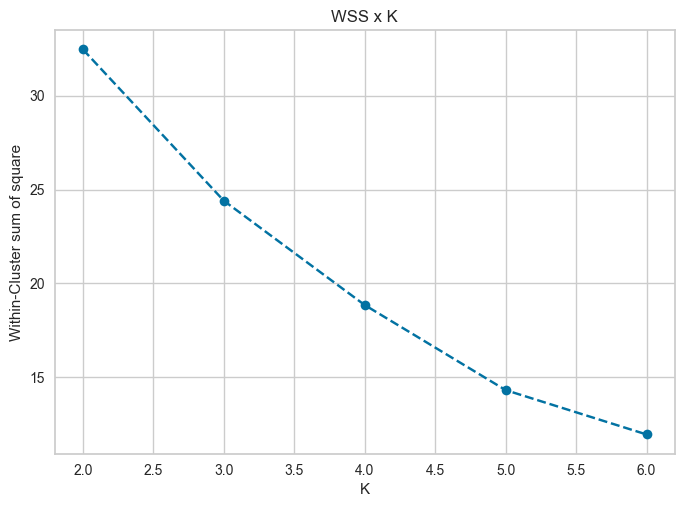

In [84]:
#plot wss - Elbow Method
plt.plot(clusters, wss, linestyle = '--', marker = 'o', color = 'b')

plt.xlabel('K');
plt.ylabel('Within-Cluster sum of square');
plt.title('WSS x K');

c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\skle

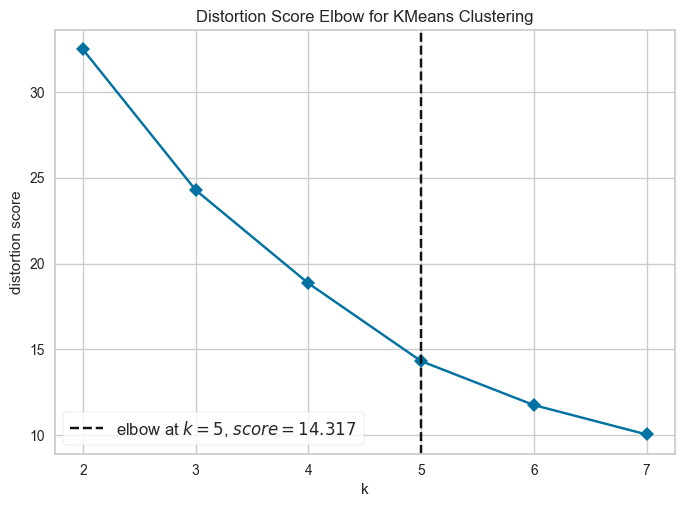

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
#SEGUNDO MÉTODO

clusters = [2, 3, 4, 5, 6, 7]

kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit(X)
kmeans.show()

### Sillhouette Score

#####  - Mede a coesão(proximidade) e a distância entre outros clusters
- WWS não considera o tamanho do cluster

![Alt text](image-1.png)

prox de 1 
 - distancia entre cluster é maior que a distancia dos pontos do cluster
 - melhor o cluster (mais distante de outros)

prox de -1 
 - distancia dos pontos do cluster maior que a distancia entre outros clusters
 - pode ser atribuição errada de ponto (distante do proprio cluster)
 - aumentar valor de k


c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\skle

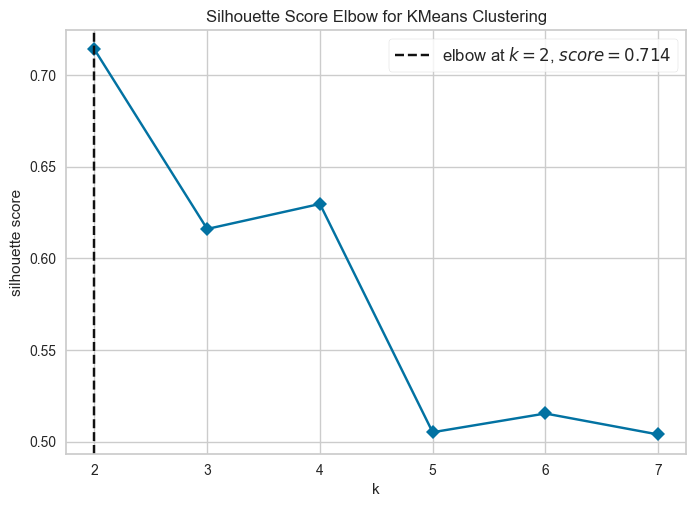

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [86]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters,metric = 'silhouette', timings = False)
kmeans.fit(X)
kmeans.show()

INSIGHTS = Mesmo após o modelo de sillhouette, retornar o valor de 2 como o melhor valor, analisando a métrica de negócio, foi observado que o valor de 3 é um exelente valor para utilizarmos como K

### Sillhouette Analysis

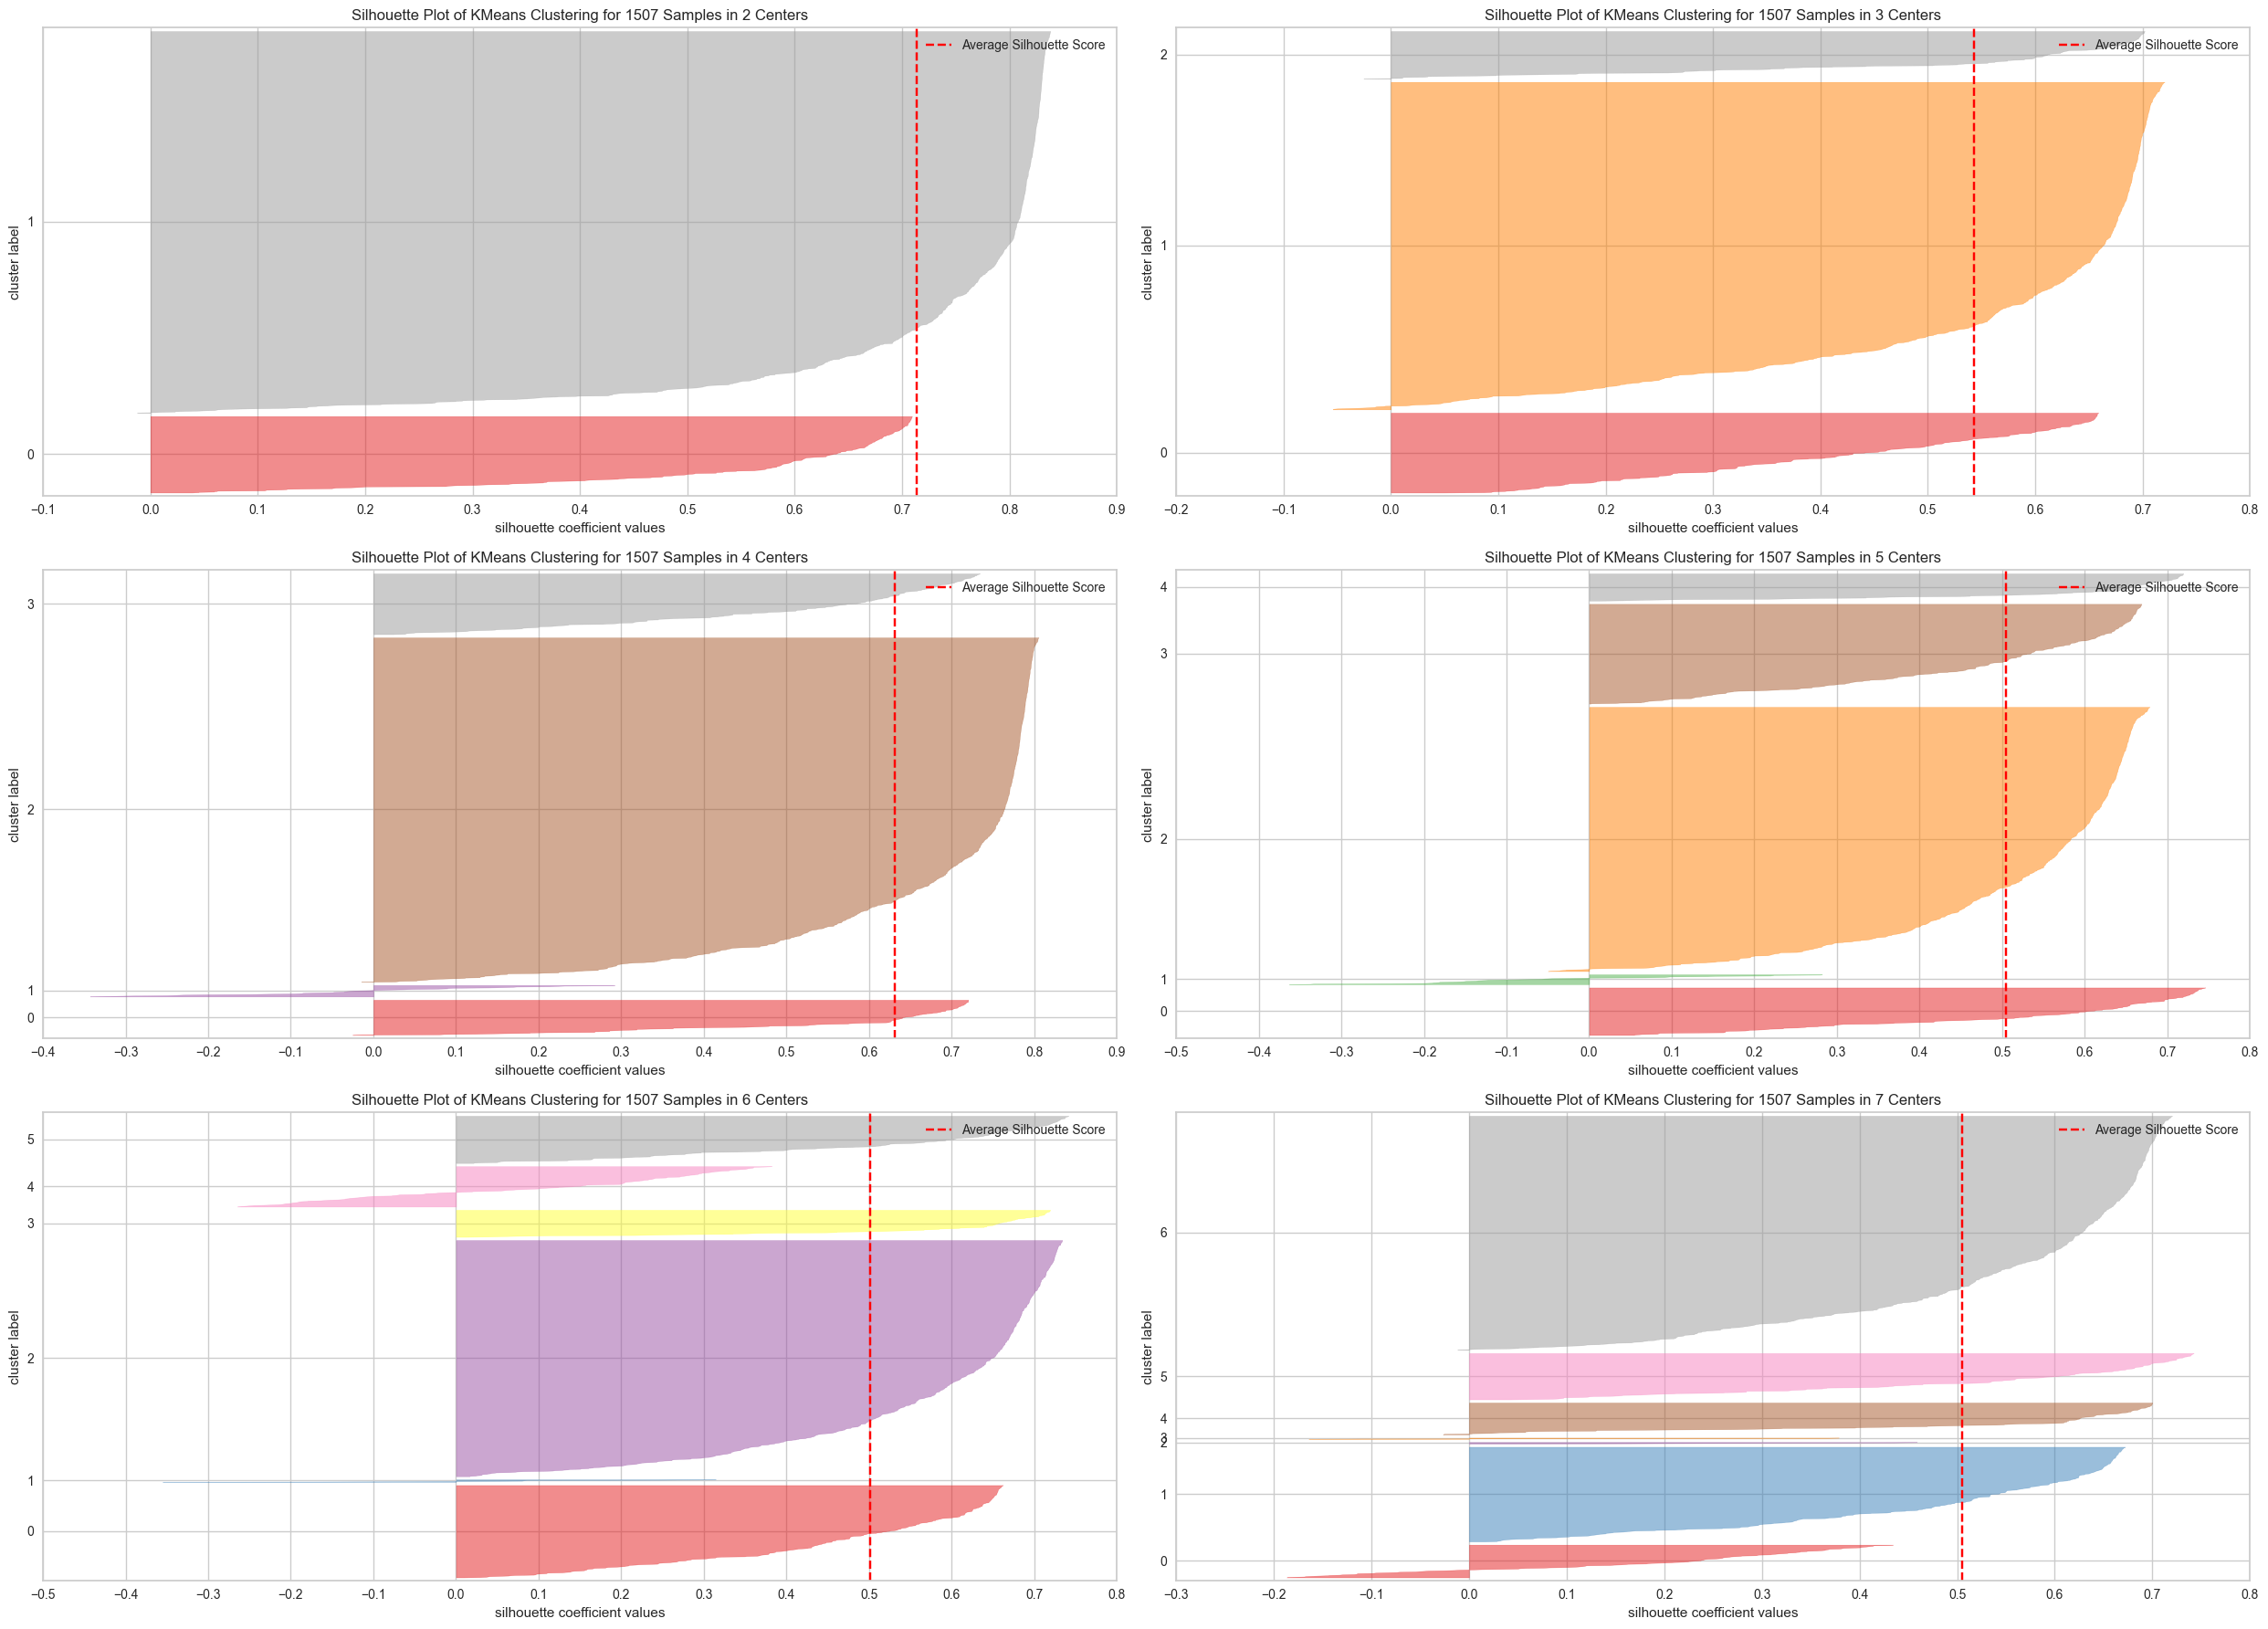

In [87]:
clusters = [2, 3, 4, 5, 6, 7]

# Crie uma figura com uma matriz de subplots 3x2
fig, axes = plt.subplots(3, 2, figsize=(25, 18))

# Aplique o loop para criar visualizações de silhueta para cada valor de k
for i, k in enumerate(clusters):
    row = i // 2  # Determina a linha do subplot
    col = i % 2   # Determina a coluna do subplot
    
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    visualizer = SilhouetteVisualizer(km, color='yellowbrick', ax=axes[row][col])
    visualizer.fit(X)
    visualizer.finalize()

# Ajuste o espaçamento entre subplots para melhorar a legibilidade
plt.tight_layout()
plt.show()

## Model Training

#### KMeans

In [88]:
#model definition
k = 6
model = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)

#model training
model.fit(X)

#clustering
labels = model.labels_

#### Cluster validation

In [89]:
#wss (within-cluster sum of square)
print(f'WSS Value: {model.inertia_}')

#ss (sillhouette score)
print(f"SS score: {m.silhouette_score(X, labels, metric='euclidean')}")

WSS Value: 11.953816750524343
SS score: 0.5012791942272711


## Cluster Analysis

In [90]:
df9 = df6.copy()
df9['cluster'] = labels #incluindo o rotulo de cada cluster em seus respectivos lugares
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns,cluster
0,17850,0.019292,0.997319,0.160976,0.000206,0.000000,3
1,13047,0.011559,0.150134,0.039024,0.000216,0.136364,0
2,12583,0.024000,0.005362,0.068293,0.000345,0.022727,2
3,15100,0.003116,0.892761,0.009756,0.003754,0.045455,3
4,15291,0.016541,0.067024,0.063415,0.000558,0.090909,4


#### Visualization Inspection

c:\Users\Cliente\anaconda3\envs\clusterizacao_fidelidade\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


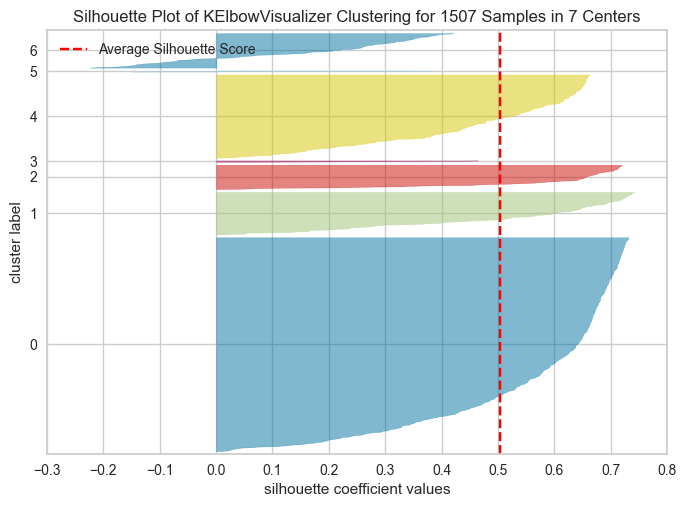

In [91]:
#visualizando silhoueta em faca
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

#### 2d Plot

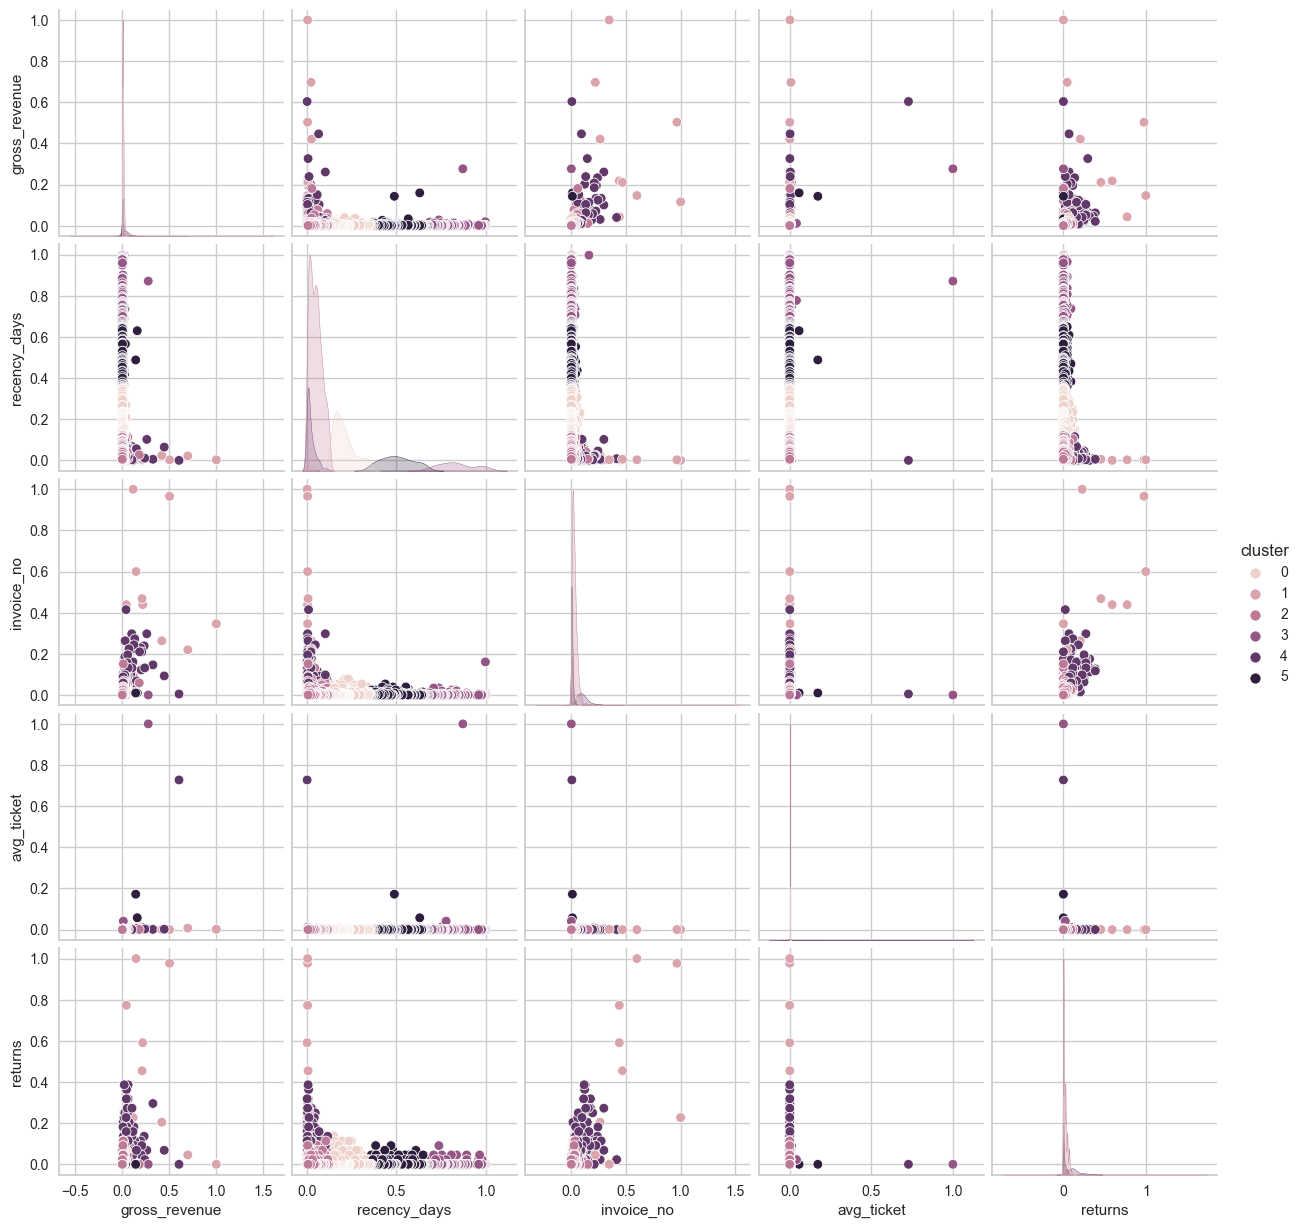

In [92]:
#visualizando par a par qual var está 'bagunçando' o cluster

df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

#### UMAP
 - O UMAP é uma técnica de redução de dimensionalidade que mapeia dados de alta dimensionalidade para um espaço de menor dimensionalidade, preservando as relações e estruturas intrínsecas dos dados. 

C:\Users\Cliente\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

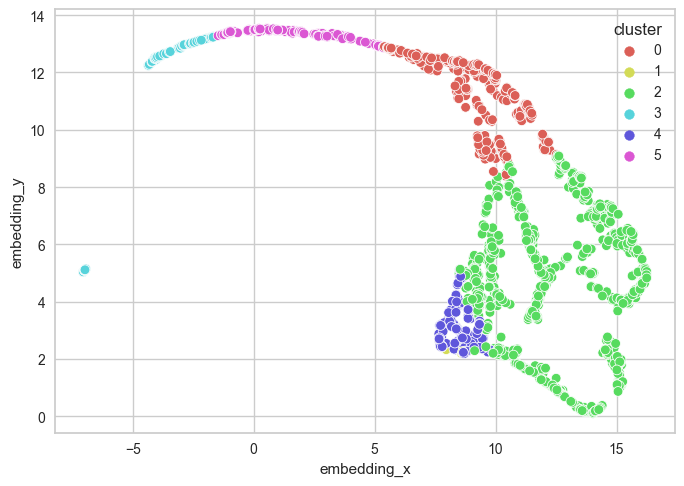

In [93]:
reducer = umap.UMAP(n_neighbors=40 , random_state=42)   #neighboors - quanto maior mais agrupado é (menor o N, maior é o zoom)
embedding = reducer.fit_transform(X)                    #projeção de alta dimensionalidade

#embedding - espaço projetado (2d -> 3d)
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='cluster', palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), #color = quantidade de clusters unicos
                data=df_viz)

#### Cluster Profile

In [94]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns,cluster
0,17850,0.019292,0.997319,0.160976,0.000206,0.000000,3
1,13047,0.011559,0.150134,0.039024,0.000216,0.136364,0
2,12583,0.024000,0.005362,0.068293,0.000345,0.022727,2
3,15100,0.003116,0.892761,0.009756,0.003754,0.045455,3
4,15291,0.016541,0.067024,0.063415,0.000558,0.090909,4


In [95]:
#number customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

#avg gross revenue (media do faturamento)
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')                  # bom para reportar p/ empresa (n_cluster, qtd_user, %_da_base, media_gasto)

#avg recency days (media da data da ultima compra)
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

#avg invoice_no (faturamento)
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')

#AVG Ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,312,20.703384,0.005482,0.205188,0.013806,0.000334
1,1,9,0.597213,0.372729,0.006851,0.526829,0.001261
2,2,797,52.886530,0.009774,0.047975,0.027671,0.000288
3,3,92,6.104844,0.005816,0.835295,0.005514,0.011869
4,4,137,9.090909,0.055384,0.020645,0.107210,0.006038
5,5,160,10.617120,0.005163,0.503267,0.007073,0.001801


##### Insight - Aumentar numero de K, não soluciona o problema. Como boa pratica o melhor seria criar novas features

In [96]:
#entrega do 1 ciclo
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,312,20.703384,0.005482,0.205188,0.013806,0.000334
1,1,9,0.597213,0.372729,0.006851,0.526829,0.001261
2,2,797,52.886530,0.009774,0.047975,0.027671,0.000288
3,3,92,6.104844,0.005816,0.835295,0.005514,0.011869
4,4,137,9.090909,0.055384,0.020645,0.107210,0.006038
5,5,160,10.617120,0.005163,0.503267,0.007073,0.001801


## Deploy to Production